## As per usual, imports first:

In [73]:
import pandas as pd 
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.seasonal import seasonal_decompose
import re

### 1) Load c02.csv using Pandas library and set date as the data frame's index. File consists of four columns: date, mean global C02 concentration, mean C02 concentration in northern hemisphere, and mean C02 concentration southern hemisphere.


In [21]:
data = pd.read_csv("co2.csv", sep=';', index_col='date') 
data = data.loc['1950-01-01':]

In [22]:
data.info

<bound method DataFrame.info of             data_mean_global  data_mean_nh  data_mean_sh
date                                                    
1950-01-15        313.597898    314.751334    312.444461
1950-02-15        313.968034    315.402500    312.533568
1950-03-15        314.274349    315.997671    312.551026
1950-04-15        314.468454    316.441488    312.495420
1950-05-15        314.310746    316.134174    312.487318
1950-06-15        313.445151    314.320397    312.569904
1950-07-15        311.784144    310.936869    312.631420
1950-08-15        310.287206    308.048248    312.526164
1950-09-15        310.342642    308.320610    312.364674
1950-10-15        311.496369    310.642231    312.350508
1950-11-15        312.593741    312.720142    312.467341
1950-12-15        313.282922    314.077770    312.488074
1951-01-15        313.779501    314.957724    312.601277
1951-02-15        314.146476    315.605855    312.687097
1951-03-15        314.450236    316.198270    312.702203

### 2) Using line plot, plot all three mean annual C02 concentrations in one figure as a function of time.


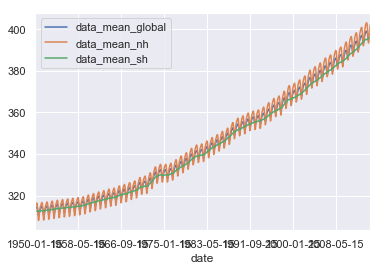

In [23]:
ax = plt.gca()
data.plot(kind='line',y='data_mean_global', ax=ax)
data.plot(kind='line',y='data_mean_nh', ax=ax)
data.plot(kind='line',y='data_mean_sh', ax=ax)
plt.show()

### 3) Using Seaborn library, visualize the spread of monthly C02 concentrations with boxplots.


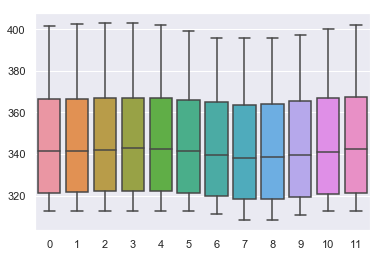

In [88]:
# Possibly this
# sns.boxplot(data=data)
# plt.show()

boxplots = [data.loc[data.index.to_series().apply(lambda x: x[5:7]==str(i).zfill(2))] for i in range(1,13)]
sns.boxplot(data=boxplots)
plt.show()

### 4) Choose one year and compare monthly C02 concentrations in both hemispheres using bar plot.


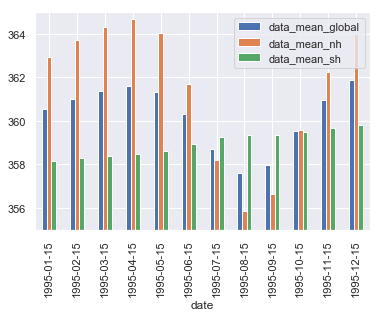

In [29]:
data.loc['1995-01-01':'1996-01-01'].plot(kind='bar', ylim=(355, 365))
plt.show()

### 5) Plot monthly C02 concentrations in both hemispheres. Examine seasonality using autocorrelation function (acf in Statsmodels library) with lags up to 15. Interpret the results.


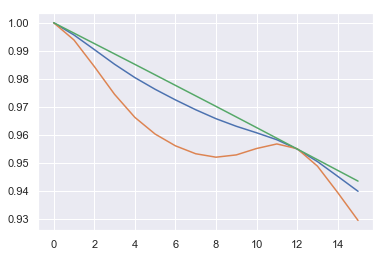

In [30]:
plt.plot(acf(x=data['data_mean_global'], nlags=15, fft=False))
plt.plot(acf(x=data['data_mean_nh'], nlags=15, fft=False))
plt.plot(acf(x=data['data_mean_sh'], nlags=15, fft=False))
plt.show()

Seasonalities exist in northern hemisphere and are visible in global mean. The CO2 emission is the most similar for lag 0 (duh) and for lag 12. It means the emission is seasonal as year goes by. The biggest differences are with 6 months lags meaning that the opposite seasons are the least correlated.

### 6) Decompose all series using additive and multiplicative models. Examine trends, seasonal, and residual components.

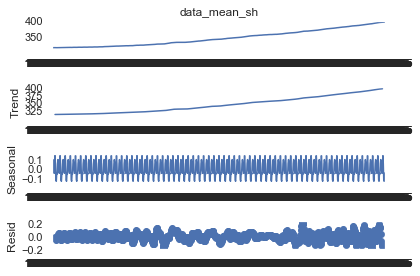

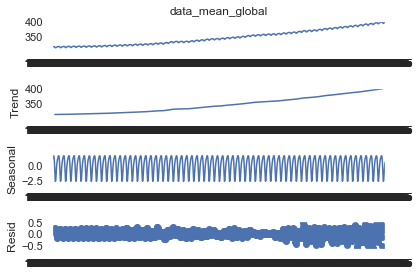

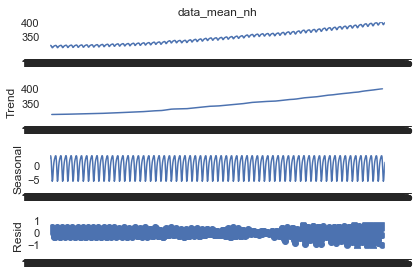

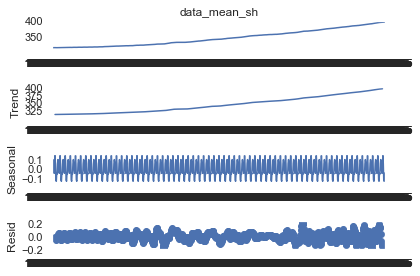

In [89]:
result = seasonal_decompose(x=data['data_mean_global'], model='additive', period=12)
result.plot()
result = seasonal_decompose(x=data['data_mean_nh'], model='additive', period=12)
result.plot()
result = seasonal_decompose(x=data['data_mean_sh'], model='additive', period=12)
result.plot()

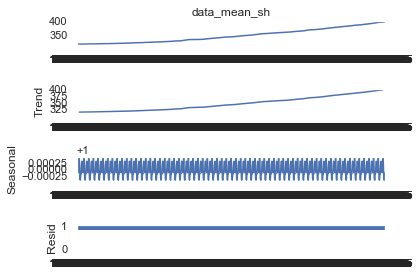

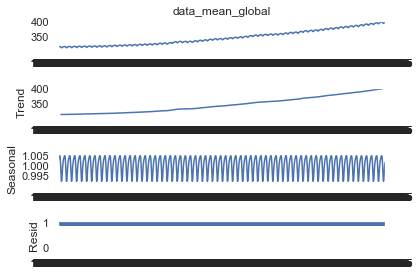

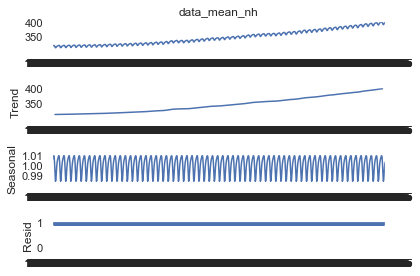

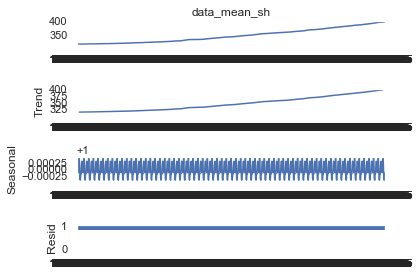

In [90]:
result = seasonal_decompose(x=data['data_mean_global'], model='multiplicative', period=12)
result.plot()
result = seasonal_decompose(x=data['data_mean_nh'], model='multiplicative', period=12)
result.plot()
result = seasonal_decompose(x=data['data_mean_sh'], model='multiplicative', period=12)
result.plot()